<a href="https://colab.research.google.com/github/jolonia/Deep-learning/blob/main/CAT_OR_DOG_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cat or Dog?

## 1. Problem statement


The deep learning process is a huge leap

forward in data science and the field is less than 10 years old.
The data collection portion of deep learning projects is a rather complex task. There is no CSV file that we can load to serve as our training data.
Constructing a training data set is a rather large undertaking. I have imported all the training images and loaded the training data through the "pickle" process.

This project will classify new, unseen images of cats and dogs. This was one of the
first big success stories of deep learning and we will go through the process of
building a learning algorithm that will do this task. Telling a picture of a cat from a
picture of a dog is easy for humans to do, but had been notoriously difficult to get a
computer learning to perform well on the task. Deep learning solved that.



## 2. Load necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

##3. Load pickled data

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
import pickle

pickle_in = open('/content/drive/MyDrive/Colab Notebooks/Copy of X.pickle','rb')
X = pickle.load(pickle_in)

pickle_in = open('/content/drive/MyDrive/Colab Notebooks/Copy of y.pickle')
y = pickle.load(pickle_in)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X.shape

(24946, 100, 100, 1)

In [ ]:
y = np.array(y)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X[0,:,:,0]

array([[ 95,  94,  98, ..., 170, 172, 171],
       [ 92,  91,  95, ..., 170, 172, 171],
       [ 89,  91,  92, ..., 165, 169, 169],
       ...,
       [ 84,  76,  73, ..., 135, 164, 154],
       [ 82,  79,  71, ..., 142, 134, 153],
       [ 80,  85,  85, ..., 151, 146, 138]], dtype=uint8)

##4. Scale the values in X

In [ ]:
X = X/255.0
y = np.array(y)

In [ ]:
X.shape

(24946, 100, 100, 1)

##5. Look at the shape of X and y

In [ ]:
X.shape

(24946, 100, 100, 1)

In [ ]:
np.shape(X[1,:,:,0])

(100, 100)

## 6. Look at one of the images in X

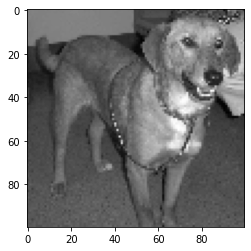

In [ ]:
plt.imshow(X[20001,:,:,0], cmap='gray')
plt.show()

## 7. Look at the response value in y for that image

In [ ]:
y[20001] # 0: Dog, 1: Cat

0

## 8. Split X and y into training and testing sets

In [ ]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## 9-11. Build a neural network. Compile your model. Fit your model using the training set.

In [ ]:
y_train.shape

(18709,)

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=X_train.shape[1:], activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=8)

Epoch 1/8
585/585 [==============================] - 30s 31ms/step - loss: 0.6262 - accuracy: 0.6309
Epoch 2/8
585/585 [==============================] - 18s 31ms/step - loss: 0.5028 - accuracy: 0.7569
Epoch 3/8
585/585 [==============================] - 18s 31ms/step - loss: 0.4504 - accuracy: 0.7884
Epoch 4/8
585/585 [==============================] - 18s 31ms/step - loss: 0.4041 - accuracy: 0.8173
Epoch 5/8
585/585 [==============================] - 18s 31ms/step - loss: 0.3637 - accuracy: 0.8360
Epoch 6/8
585/585 [==============================] - 18s 30ms/step - loss: 0.3306 - accuracy: 0.8543
Epoch 7/8
585/585 [==============================] - 18s 31ms/step - loss: 0.2961 - accuracy: 0.8719
Epoch 8/8
585/585 [==============================] - 18s 31ms/step - loss: 0.2637 - accuracy: 0.8863


## 12. Evaluate your model using the test set.

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

195/195 [==============================] - 3s 14ms/step - loss: 0.3468 - accuracy: 0.8568
0.8568221926689148


Save model to disk.

In [ ]:
#model.save('/content/drive/My Drive/Instructor Material/Projects (For Licensing)/Project 6/64x3-CNN-2.model')

Load model from disk.

In [ ]:
#model2 = tf.keras.models.load_model('/content/drive/My Drive/Instructor Material/Projects (For Licensing)/Project 6/64x3-CNN-2.model')

## 13. Define a function to read in a new image and convert it to a 4D array of pixels

In [ ]:
def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

## 14. Read in dog.jpg image

In [ ]:
filepath = '/drive/My Drive/Data Science Instructor Material (for licensing)/Projects/Project 6/Data/dog.jpg'

X_in = prepare(filepath)

img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

## 15. Use the neural network to predict whether the image is a dog or cat

In [ ]:
prediction = model.predict(X_in)
prediction

In [ ]:
# Get class prediction
class_pred = (prediction > 0.5).astype("int32")
class_pred

## Bonus

In [ ]:
filepath = '/drive/My Drive/Data Science Instructor Material (for licensing)/Projects/Project 6/Data/kitt.jpg'

X_in = prepare(filepath)

img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
plt.imshow(img_array, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict(X_in)
prediction

In [ ]:
# Get class prediction
class_pred = (prediction > 0.5).astype("int32")
class_pred